In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
x = iris["data"][:, :2]
y = iris["target"]

In [7]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class='multinomial', C=10, random_state=1)

softmax_reg.fit(x,y)
softmax_reg.intercept_, softmax_reg.coef_

(array([ 13.81862143,  -0.51550497, -13.30311646]),
 array([[-5.10014342,  4.5761126 ],
        [ 1.65077685, -2.55843875],
        [ 3.44936658, -2.01767385]]))

In [8]:
softmax_reg.score(x,y)

0.8333333333333334

In [9]:
x_new = [[6.7,4.25], [4.9,3.3], [5.2,2.5]]

In [10]:
softmax_reg.predict(x_new)

array([2, 0, 1])

In [11]:
softmax_reg.predict_proba(x_new)

array([[8.89184388e-02, 1.58050678e-01, 7.53030883e-01],
       [9.90919922e-01, 8.16614717e-03, 9.13930783e-04],
       [4.51456319e-02, 8.49097632e-01, 1.05756737e-01]])

In [12]:
#梯度下降法(分類的)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=1)

sgd_clf.fit(x,y)
sgd_clf.intercept_, sgd_clf.coef_

(array([  55.54618827,  126.76827608, -228.4728105 ]),
 array([[-100.79931973,  154.5939514 ],
        [   4.11931173,  -66.95649133],
        [  50.02226368,  -32.46333318]]))

In [13]:
sgd_clf.score(x,y)

0.7266666666666667

In [14]:
x_new = [[6.7,4.25], [4.9,3.3], [5.2,2.5]]

In [15]:
sgd_clf.predict(x_new)

array([0, 0, 1])

In [16]:
sgd_clf.predict_proba(x_new)

array([[1.00000000e+00, 2.85744199e-57, 2.56865255e-14],
       [1.00000000e+00, 7.25572081e-33, 5.00624319e-40],
       [4.70919996e-28, 1.00000000e+00, 6.84384877e-14]])

In [18]:
x1, x2 = np.meshgrid(
    np.linspace(4.2, 8, 1000).reshape(-1,1),
    np.linspace(1.8, 4.5, 1000).reshape(-1,1)
)
x_new = np.c_[x1.ravel(),x2.ravel()]
y_pred = softmax_reg.predict(x_new)

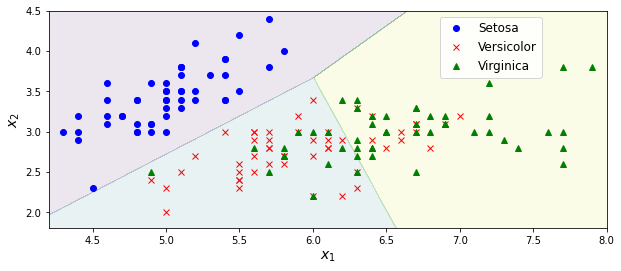

In [21]:
plt.figure(figsize=(10,4))
plt.plot(x[y==0, 0], x[y==0, 1], "bo", label="Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "rx", label="Versicolor")
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Virginica")

zz = y_pred.reshape(x1.shape)
plt.contourf(x1, x2, zz, alpha=0.1) #這裡的alpha在控制等高線圖背景的顏色

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(0.69,1), fontsize=12)
plt.axis([4.2, 8, 1.8, 4.5])
plt.show()